# Simulation & Agent Test

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
import math
import numpy as np

In [63]:
from environment_factory import Environment
from astar_agent import Astar_Agent

In [64]:
grid = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [2, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
]

env = Environment(grid, init_row=1,init_colmn=0)

# A* Agent

In [65]:
# Try 10 game.
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    astar_agent = Astar_Agent(grid)
    total_reward = 0
    done = False
    while not done:
        action = astar_agent.action()
        next_state, reward, done = env.step(env.actions[action])
        
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, action, reward)
        #print(state, env.actions[action], action, 'reward', reward)
        #print(env.assembly_in.product_all, env.assembly.stock)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets 0.9944444444444441 reward.
Episode 1: Agent gets 0.9852777777777779 reward.
Episode 2: Agent gets 0.9944444444444442 reward.
Episode 3: Agent gets 1.0037962962962963 reward.
Episode 4: Agent gets 0.3748148148148149 reward.
Episode 5: Agent gets 0.7914814814814813 reward.
Episode 6: Agent gets 0.3192592592592594 reward.
Episode 7: Agent gets 0.31000000000000016 reward.
Episode 8: Agent gets 0.4766666666666659 reward.
Episode 9: Agent gets 0.44888888888888895 reward.


# A* + Stanby

In [66]:
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    astar_agent = Astar_Agent(grid)
    total_reward = 0
    done = False
    while not done:
        action = astar_agent.action_stanby([state.row, state.column], state.agv_stock)
        next_state, reward, done = env.step(env.actions[action])
        
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, action, reward)
        #print(state, env.actions[action], action, 'reward', reward)
        #print(env.assembly_in.product_all, env.assembly.stock)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets 1.0315740740740742 reward.
Episode 1: Agent gets 1.0500925925925928 reward.
Episode 2: Agent gets 1.0408333333333335 reward.
Episode 3: Agent gets 1.0130555555555556 reward.
Episode 4: Agent gets 1.0315740740740742 reward.
Episode 5: Agent gets 1.0315740740740744 reward.
Episode 6: Agent gets 0.9852777777777779 reward.
Episode 7: Agent gets 1.0130555555555558 reward.
Episode 8: Agent gets 1.0500925925925928 reward.
Episode 9: Agent gets 1.0130555555555556 reward.


# Q-Learning Agent

In [6]:
from q_learning import QLearningAgent

In [7]:
qagent = QLearningAgent(epsilon=0.01)
env = Environment(grid, init_row=1,init_colmn=0)

At Episode 50 average reward is -0.034 (+/-0.017).
At Episode 100 average reward is -0.014 (+/-0.028).
At Episode 150 average reward is 0.007 (+/-0.03).
At Episode 200 average reward is 0.014 (+/-0.037).
At Episode 250 average reward is 0.012 (+/-0.034).
At Episode 300 average reward is 0.006 (+/-0.026).
At Episode 350 average reward is 0.013 (+/-0.031).
At Episode 400 average reward is 0.001 (+/-0.017).
At Episode 450 average reward is 0.015 (+/-0.034).
At Episode 500 average reward is 0.016 (+/-0.037).
At Episode 550 average reward is 0.017 (+/-0.038).
At Episode 600 average reward is 0.006 (+/-0.023).
At Episode 650 average reward is 0.007 (+/-0.025).
At Episode 700 average reward is 0.012 (+/-0.034).
At Episode 750 average reward is 0.006 (+/-0.023).
At Episode 800 average reward is 0.018 (+/-0.042).
At Episode 850 average reward is 0.006 (+/-0.03).
At Episode 900 average reward is 0.012 (+/-0.034).
At Episode 950 average reward is 0.008 (+/-0.031).
At Episode 1000 average reward i

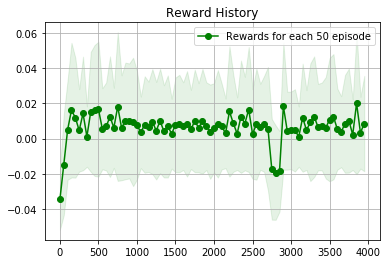

In [8]:
env.reset()
qagent.learn(env, episode_count=4000)
#show_q_value(agent.Q)
qagent.show_reward_log()

In [29]:
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        ob = state.row*env.column_length + state.column + state.agv_stock*env.row_length*env.column_length
        action = np.argmax(qagent.Q[ob])
        next_state, reward, done = env.step(env.actions[action])
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, env.actions[action], reward)
        #print(state, env.actions[action], action, 'reward', reward)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets 0.9760185185185186 reward.
Episode 1: Agent gets 1.0130555555555556 reward.
Episode 2: Agent gets 1.0037962962962963 reward.
Episode 3: Agent gets 0.9760185185185186 reward.
Episode 4: Agent gets 1.0592592592592593 reward.
Episode 5: Agent gets 1.0037962962962963 reward.
Episode 6: Agent gets 1.0130555555555556 reward.
Episode 7: Agent gets 1.0223148148148151 reward.
Episode 8: Agent gets 0.9852777777777778 reward.
Episode 9: Agent gets 1.077777777777778 reward.


In [17]:
from q_learning import QLearningAgentOrign

At Episode 50 average reward is -0.034 (+/-0.017).
At Episode 100 average reward is -0.022 (+/-0.025).
At Episode 150 average reward is -0.029 (+/-0.014).
At Episode 200 average reward is -0.03 (+/-0.014).
At Episode 250 average reward is -0.029 (+/-0.018).
At Episode 300 average reward is -0.027 (+/-0.019).
At Episode 350 average reward is -0.028 (+/-0.017).
At Episode 400 average reward is -0.021 (+/-0.029).
At Episode 450 average reward is -0.024 (+/-0.025).
At Episode 500 average reward is -0.016 (+/-0.022).
At Episode 550 average reward is -0.003 (+/-0.03).
At Episode 600 average reward is -0.009 (+/-0.012).
At Episode 650 average reward is -0.003 (+/-0.024).
At Episode 700 average reward is -0.003 (+/-0.027).
At Episode 750 average reward is -0.009 (+/-0.017).
At Episode 800 average reward is -0.011 (+/-0.003).
At Episode 850 average reward is -0.001 (+/-0.027).
At Episode 900 average reward is -0.01 (+/-0.013).
At Episode 950 average reward is -0.009 (+/-0.013).
At Episode 1000 

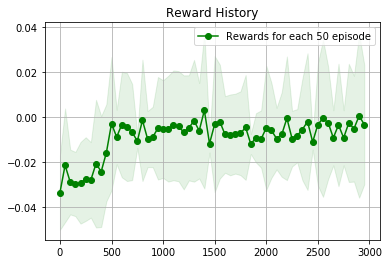

In [34]:
qagent_orign = QLearningAgentOrign(epsilon=0.01)
env = Environment(grid, init_row=1,init_colmn=0)
env.reset()
qagent_orign.learn(env, episode_count=3000)
qagent_orign.show_reward_log()

In [36]:
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = np.argmax(qagent_orign.Q[state])
        next_state, reward, done = env.step(env.actions[action])
        total_reward += reward
        state = next_state
        #print(state, env.actions[action], action, 'reward', reward)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

Episode 0: Agent gets 0.18805555555555575 reward.
Episode 1: Agent gets 0.20675925925925945 reward.
Episode 2: Agent gets 0.25268518518518535 reward.
Episode 3: Agent gets 0.22509259259259276 reward.
Episode 4: Agent gets 0.17898148148148169 reward.
Episode 5: Agent gets 0.21583333333333354 reward.
Episode 6: Agent gets 0.19731481481481503 reward.
Episode 7: Agent gets 0.10490740740740759 reward.
Episode 8: Agent gets 0.22490740740740758 reward.
Episode 9: Agent gets 0.197314814814815 reward.


# MonteCaro Agent

In [37]:
from q_learning import MonteCarloAgent

At Episode 50 average reward is -0.038 (+/-0.003).
At Episode 100 average reward is -0.039 (+/-0.003).
At Episode 150 average reward is -0.039 (+/-0.003).
At Episode 200 average reward is -0.04 (+/-0.004).
At Episode 250 average reward is -0.039 (+/-0.003).
At Episode 300 average reward is -0.039 (+/-0.003).
At Episode 350 average reward is -0.039 (+/-0.003).
At Episode 400 average reward is -0.038 (+/-0.012).
At Episode 450 average reward is -0.037 (+/-0.013).
At Episode 500 average reward is -0.04 (+/-0.004).
At Episode 550 average reward is -0.039 (+/-0.013).
At Episode 600 average reward is -0.039 (+/-0.004).
At Episode 650 average reward is -0.038 (+/-0.013).
At Episode 700 average reward is -0.039 (+/-0.003).
At Episode 750 average reward is -0.039 (+/-0.004).
At Episode 800 average reward is -0.039 (+/-0.004).
At Episode 850 average reward is -0.04 (+/-0.004).
At Episode 900 average reward is -0.039 (+/-0.003).
At Episode 950 average reward is -0.039 (+/-0.003).
At Episode 1000 

At Episode 7950 average reward is -0.001 (+/-0.029).
At Episode 8000 average reward is 0.006 (+/-0.038).
At Episode 8050 average reward is 0.003 (+/-0.033).
At Episode 8100 average reward is 0.006 (+/-0.037).
At Episode 8150 average reward is 0.001 (+/-0.032).
At Episode 8200 average reward is -0.004 (+/-0.026).
At Episode 8250 average reward is 0.002 (+/-0.033).
At Episode 8300 average reward is 0.008 (+/-0.036).
At Episode 8350 average reward is -0.002 (+/-0.029).
At Episode 8400 average reward is 0.005 (+/-0.036).
At Episode 8450 average reward is 0.009 (+/-0.037).
At Episode 8500 average reward is -0.002 (+/-0.027).
At Episode 8550 average reward is 0.009 (+/-0.041).
At Episode 8600 average reward is 0.007 (+/-0.036).
At Episode 8650 average reward is -0.001 (+/-0.029).
At Episode 8700 average reward is 0.005 (+/-0.034).
At Episode 8750 average reward is 0.0 (+/-0.035).
At Episode 8800 average reward is -0.001 (+/-0.03).
At Episode 8850 average reward is 0.002 (+/-0.032).
At Episod

At Episode 15850 average reward is 0.005 (+/-0.035).
At Episode 15900 average reward is 0.004 (+/-0.034).
At Episode 15950 average reward is 0.008 (+/-0.037).
At Episode 16000 average reward is 0.003 (+/-0.032).
At Episode 16050 average reward is 0.007 (+/-0.036).
At Episode 16100 average reward is 0.01 (+/-0.038).
At Episode 16150 average reward is -0.004 (+/-0.026).
At Episode 16200 average reward is 0.008 (+/-0.04).
At Episode 16250 average reward is 0.006 (+/-0.037).
At Episode 16300 average reward is 0.003 (+/-0.033).
At Episode 16350 average reward is 0.01 (+/-0.039).
At Episode 16400 average reward is 0.008 (+/-0.036).
At Episode 16450 average reward is -0.002 (+/-0.032).
At Episode 16500 average reward is -0.001 (+/-0.03).
At Episode 16550 average reward is -0.003 (+/-0.027).
At Episode 16600 average reward is 0.002 (+/-0.032).
At Episode 16650 average reward is 0.009 (+/-0.042).
At Episode 16700 average reward is 0.005 (+/-0.034).
At Episode 16750 average reward is 0.003 (+/-0

At Episode 23550 average reward is 0.001 (+/-0.031).
At Episode 23600 average reward is 0.009 (+/-0.041).
At Episode 23650 average reward is -0.007 (+/-0.017).
At Episode 23700 average reward is 0.004 (+/-0.034).
At Episode 23750 average reward is 0.003 (+/-0.033).
At Episode 23800 average reward is 0.009 (+/-0.038).
At Episode 23850 average reward is 0.0 (+/-0.03).
At Episode 23900 average reward is 0.002 (+/-0.03).
At Episode 23950 average reward is -0.007 (+/-0.02).
At Episode 24000 average reward is -0.002 (+/-0.025).
At Episode 24050 average reward is -0.004 (+/-0.023).
At Episode 24100 average reward is 0.005 (+/-0.033).
At Episode 24150 average reward is 0.001 (+/-0.03).
At Episode 24200 average reward is 0.004 (+/-0.034).
At Episode 24250 average reward is 0.002 (+/-0.032).
At Episode 24300 average reward is 0.003 (+/-0.032).
At Episode 24350 average reward is 0.001 (+/-0.03).
At Episode 24400 average reward is 0.006 (+/-0.035).
At Episode 24450 average reward is 0.007 (+/-0.03

At Episode 31250 average reward is 0.003 (+/-0.032).
At Episode 31300 average reward is -0.0 (+/-0.027).
At Episode 31350 average reward is -0.0 (+/-0.028).
At Episode 31400 average reward is 0.008 (+/-0.035).
At Episode 31450 average reward is -0.005 (+/-0.022).
At Episode 31500 average reward is 0.012 (+/-0.039).
At Episode 31550 average reward is 0.01 (+/-0.037).
At Episode 31600 average reward is 0.003 (+/-0.033).
At Episode 31650 average reward is -0.004 (+/-0.021).
At Episode 31700 average reward is 0.006 (+/-0.038).
At Episode 31750 average reward is 0.001 (+/-0.032).
At Episode 31800 average reward is -0.001 (+/-0.026).
At Episode 31850 average reward is 0.009 (+/-0.036).
At Episode 31900 average reward is 0.007 (+/-0.035).
At Episode 31950 average reward is 0.003 (+/-0.031).
At Episode 32000 average reward is -0.002 (+/-0.024).
At Episode 32050 average reward is 0.001 (+/-0.028).
At Episode 32100 average reward is 0.009 (+/-0.037).
At Episode 32150 average reward is 0.001 (+/-

At Episode 39000 average reward is 0.003 (+/-0.03).
At Episode 39050 average reward is 0.009 (+/-0.034).
At Episode 39100 average reward is 0.013 (+/-0.039).
At Episode 39150 average reward is -0.001 (+/-0.027).
At Episode 39200 average reward is 0.001 (+/-0.028).
At Episode 39250 average reward is -0.0 (+/-0.03).
At Episode 39300 average reward is 0.011 (+/-0.037).
At Episode 39350 average reward is 0.008 (+/-0.035).
At Episode 39400 average reward is 0.009 (+/-0.034).
At Episode 39450 average reward is 0.0 (+/-0.026).
At Episode 39500 average reward is 0.012 (+/-0.037).
At Episode 39550 average reward is 0.004 (+/-0.033).
At Episode 39600 average reward is 0.008 (+/-0.035).
At Episode 39650 average reward is 0.009 (+/-0.035).
At Episode 39700 average reward is 0.012 (+/-0.037).
At Episode 39750 average reward is 0.002 (+/-0.026).
At Episode 39800 average reward is 0.004 (+/-0.032).
At Episode 39850 average reward is -0.003 (+/-0.024).
At Episode 39900 average reward is 0.006 (+/-0.03

At Episode 46850 average reward is 0.015 (+/-0.035).
At Episode 46900 average reward is 0.021 (+/-0.044).
At Episode 46950 average reward is 0.014 (+/-0.038).
At Episode 47000 average reward is 0.015 (+/-0.037).
At Episode 47050 average reward is 0.012 (+/-0.041).
At Episode 47100 average reward is 0.023 (+/-0.042).
At Episode 47150 average reward is 0.011 (+/-0.036).
At Episode 47200 average reward is 0.015 (+/-0.039).
At Episode 47250 average reward is 0.015 (+/-0.04).
At Episode 47300 average reward is 0.008 (+/-0.028).
At Episode 47350 average reward is 0.016 (+/-0.041).
At Episode 47400 average reward is 0.014 (+/-0.038).
At Episode 47450 average reward is 0.015 (+/-0.036).
At Episode 47500 average reward is 0.022 (+/-0.042).
At Episode 47550 average reward is 0.022 (+/-0.046).
At Episode 47600 average reward is 0.003 (+/-0.024).
At Episode 47650 average reward is 0.007 (+/-0.034).
At Episode 47700 average reward is 0.019 (+/-0.037).
At Episode 47750 average reward is 0.009 (+/-0.

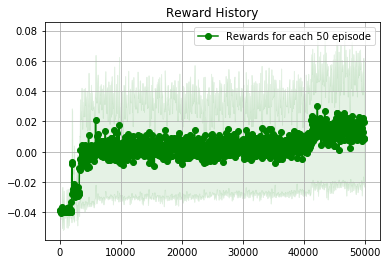

In [58]:
mqagent = MonteCarloAgent(epsilon=0.1)

env = Environment(grid, init_row=1,init_colmn=0)
env.reset()

mqagent.learn(env, episode_count=50000)
#show_q_value(agent.Q)
mqagent.show_reward_log()

In [61]:
for i in range(10):
    # Initialize position of agent.
    state = env.reset()
    total_reward = 0
    done = False
    while not done:
        action = np.argmax(mqagent.Q[state])
        next_state, reward, done = env.step(env.actions[action])
        total_reward += reward
        state = next_state
        #print(state.row, state.column, state.agv_stock, env.actions[action], reward)
        print(state, env.actions[action], action, 'reward', reward)
    print("Episode {}: Agent gets {} reward.".format(i, total_reward))

<State: [1, 1, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 2, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 3, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 4, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 5, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 6, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 7, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 8, 0, 0, 0]> Action.RIGHT 3 reward 0.08296296296296297
<State: [1, 7, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 6, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 5, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 4, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 3, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 2, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 1, 0, 0, 0]> Actio

<State: [1, 7, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 6, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 5, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 4, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 3, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 2, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 1, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 0, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [2, 0, 0, 0, 1]> Action.DOWN 1 reward -0.00962962962962963
<State: [1, 0, 1, 0, 0]> Action.UP 0 reward 0.08287037037037039
<State: [1, 1, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 2, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 3, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 4, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 5, 1, 0, 0]> Action.R

<State: [1, 1, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 2, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 3, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 4, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 5, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 6, 1, 0, 0]> Action.RIGHT 3 reward 0.08287037037037039
<State: [1, 7, 1, 0, 0]> Action.RIGHT 3 reward -0.000462962962962963
<State: [1, 8, 0, 0, 0]> Action.RIGHT 3 reward 0.08296296296296297
<State: [1, 7, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 6, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 5, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 4, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
<State: [1, 3, 0, 0, 0]> Action.LEFT 2 reward -0.00037037037037037035
Episode 7: Agent gets 1.0037962962962965 reward.
<State: [1, 1, 1, 0, 0]> Action.RIGHT 3 reward -0.000